In [ ]:
!git clone https://github.com/PhonePe/pulse.git # cloning the phonepe pulse repository for data extract

Cloning into 'pulse'...
remote: Enumerating objects: 17904, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 17904 (delta 19), reused 17 (delta 17), pack-reused 17855 (from 2)
Receiving objects: 100% (17904/17904), 26.13 MiB | 24.94 MiB/s, done.
Resolving deltas: 100% (8723/8723), done.


In [ ]:
import pandas as pd # to store / change data
import json # in format of json file
import os # to get / interact with file
path="/content/pulse/data/aggregated/transaction/country/india/state/" # root path for agg_transaction
Agg_state_list=os.listdir(path) # All state list
Agg_trans_data={'State':[], 'Year':[],'Quarter':[],'Transaction_type':[], 'Transaction_count':[], 'Transaction_amount':[]}

for state_name in Agg_state_list: # state list
    state_path=path+state_name+"/"
    Agg_yr=os.listdir(state_path)
    for year in Agg_yr: #year list
        year_path=state_path+year+"/"
        Agg_yr_list=os.listdir(year_path)
        for quarter in Agg_yr_list: # quarter list
            quarter_path=year_path+quarter
            Data=open(quarter_path,'r')
            D=json.load(Data)
            for z in D['data']['transactionData']: # data extraction
              Name=z['name']
              count=z['paymentInstruments'][0]['count']
              amount=z['paymentInstruments'][0]['amount']
              Agg_trans_data['Transaction_type'].append(Name) # appending data in dictionary
              Agg_trans_data['Transaction_count'].append(count)
              Agg_trans_data['Transaction_amount'].append(amount)
              Agg_trans_data['State'].append(state_name)
              Agg_trans_data['Year'].append(year)
              Agg_trans_data['Quarter'].append(int(quarter.strip('.json')))

Agg_Trans_df=pd.DataFrame(Agg_trans_data) # converting dictionary to dataframe



In [ ]:
Agg_Trans_df

,State,Year,Quarter,Transaction_type,Transaction_count,Transaction_amount
0,odisha,2023,3,Merchant payments,337194096,1.601827e+11
1,odisha,2023,3,Peer-to-peer payments,239288791,6.516199e+11
2,odisha,2023,3,Recharge & bill payments,45575270,2.805283e+10
3,odisha,2023,3,Financial Services,174288,2.720203e+08
4,odisha,2023,3,Others,165158,1.708757e+08
...,...,...,...,...,...,...
5029,rajasthan,2018,1,Recharge & bill payments,4305940,8.683586e+08
5030,rajasthan,2018,1,Peer-to-peer payments,2540658,7.547653e+09
5031,rajasthan,2018,1,Financial Services,202537,3.712547e+07
5032,rajasthan,2018,1,Merchant payments,184127,2.012127e+08


In [ ]:
import pandas as pd
import json
import os
path="/content/pulse/data/aggregated/user/country/india/state/"
Agg_state_list=os.listdir(path)
Agg_user_data={'State':[], 'Year':[],'Quarter':[],'user_brand':[], 'user_count':[], 'user_percentage':[]}

for state_name in Agg_state_list:
    state_path = path + state_name + "/"
    Agg_yr = os.listdir(state_path)
    for year in Agg_yr:
        year_path = state_path + year + "/"
        Agg_yr_list = os.listdir(year_path)
        for quarter in Agg_yr_list:
            quarter_path = year_path + quarter
            Data = open(quarter_path, 'r')
            D = json.load(Data)
            if D['data']['usersByDevice']:
                for z in D['data']['usersByDevice']:
                    brand = z['brand']
                    count = z['count']
                    percentage = z['percentage']
                    Agg_user_data['user_brand'].append(brand)
                    Agg_user_data['user_count'].append(count)
                    Agg_user_data['user_percentage'].append(percentage)
                    Agg_user_data['State'].append(state_name)
                    Agg_user_data['Year'].append(year)
                    Agg_user_data['Quarter'].append(int(quarter.strip('.json')))
Agg_user_df=pd.DataFrame(Agg_user_data)

In [ ]:
Agg_user_df

,State,Year,Quarter,user_brand,user_count,user_percentage
0,odisha,2021,3,Xiaomi,2958185,0.277699
1,odisha,2021,3,Vivo,1849105,0.173584
2,odisha,2021,3,Samsung,1745741,0.163881
3,odisha,2021,3,Oppo,1456997,0.136775
4,odisha,2021,3,Realme,1038215,0.097462
...,...,...,...,...,...,...
6727,rajasthan,2018,1,OnePlus,71745,0.022717
6728,rajasthan,2018,1,Gionee,69299,0.021943
6729,rajasthan,2018,1,Lenovo,63011,0.019952
6730,rajasthan,2018,1,Motorola,61235,0.019389


In [ ]:
import os
import json
import pandas as pd
path="/content/pulse/data/aggregated/insurance/country/india/state/"
Agg_ins_list=os.listdir(path)
Agg_ins_data={'State':[], 'Year':[],'Quarter':[],'Transaction_type':[], 'Transaction_count':[], 'Transaction_amount':[]}
for state_name in Agg_ins_list:
    state_path=path+state_name+"/"
    Agg_yr=os.listdir(state_path)
    for year in Agg_yr:
        year_path=state_path+year+"/"
        Agg_yr_list=os.listdir(year_path)
        for quarter in Agg_yr_list:
            quarter_path=year_path+quarter
            Data=open(quarter_path,'r')
            D=json.load(Data)
            for z in D['data']['transactionData']:
              Name=z['name']
              count=z['paymentInstruments'][0]['count']
              amount=z['paymentInstruments'][0]['amount']
              Agg_ins_data['Transaction_type'].append(Name)
              Agg_ins_data['Transaction_count'].append(count)
              Agg_ins_data['Transaction_amount'].append(amount)
              Agg_ins_data['State'].append(state_name)
              Agg_ins_data['Year'].append(year)
              Agg_ins_data['Quarter'].append(int(quarter.strip('.json')))


Agg_ins_df=pd.DataFrame(Agg_ins_data)

In [ ]:
Agg_ins_df

,State,Year,Quarter,Transaction_type,Transaction_count,Transaction_amount
0,odisha,2023,3,Insurance,20263,29008350.0
1,odisha,2023,2,Insurance,22163,31307110.0
2,odisha,2023,4,Insurance,25065,39753392.0
3,odisha,2023,1,Insurance,18899,29360555.0
4,odisha,2021,3,Insurance,7967,6008686.0
...,...,...,...,...,...,...
677,rajasthan,2020,4,Insurance,12509,6471573.0
678,rajasthan,2022,3,Insurance,33975,45565544.0
679,rajasthan,2022,2,Insurance,24333,33748931.0
680,rajasthan,2022,4,Insurance,40926,60792838.0


In [ ]:
import os
import json
import pandas as pd
path="/content/pulse/data/map/insurance/hover/country/india/state/"
Map_ins_list=os.listdir(path)
Map_ins_data={'State': [],'Year': [],'Quarter': [],'District': [],'Insurance_Count': [],'Insurance_Amount': []}
for state_name in Map_ins_list:
    state_path = path + state_name + "/"
    Map_yr = os.listdir(state_path)
    for year in Map_yr:
        year_path = state_path + year + "/"
        Map_yr_list = os.listdir(year_path)
        for quarter in Map_yr_list:
            quarter_path = year_path + quarter
            Data = open(quarter_path, 'r')
            D = json.load(Data)
            for z in D['data']['hoverDataList']:
                district = z['name']
                count = z['metric'][0]['count']
                amount = z['metric'][0]['amount']
                Map_ins_data['District'].append(district)
                Map_ins_data['Insurance_Count'].append(count)
                Map_ins_data['Insurance_Amount'].append(amount)
                Map_ins_data['State'].append(state_name)
                Map_ins_data['Year'].append(year)
                Map_ins_data['Quarter'].append(int(quarter.strip('.json')))
Map_ins_df = pd.DataFrame(Map_ins_data)


In [ ]:
Map_ins_df

,State,Year,Quarter,District,Insurance_Count,Insurance_Amount
0,odisha,2023,3,rayagada district,457,706953.0
1,odisha,2023,3,koraput district,556,932640.0
2,odisha,2023,3,malkangiri district,138,254025.0
3,odisha,2023,3,sambalpur district,720,993849.0
4,odisha,2023,3,kalahandi district,352,656310.0
...,...,...,...,...,...,...
13871,rajasthan,2022,1,bundi district,157,184951.0
13872,rajasthan,2022,1,jhalawar district,164,195764.0
13873,rajasthan,2022,1,alwar district,1331,1943529.0
13874,rajasthan,2022,1,kota district,710,957885.0


In [ ]:
import os
import json
import pandas as pd
path="/content/pulse/data/map/transaction/hover/country/india/state/"
Map_trans_list=os.listdir(path)
Map_trans_data={'State': [],'Year': [],'Quarter': [],'District': [],'Transaction_Count': [],'Transaction_Amount': []}
for state_name in Map_trans_list:
    state_path = path + state_name + "/"
    Map_yr = os.listdir(state_path)
    for year in Map_yr:
        year_path = state_path + year + "/"
        Map_yr_list = os.listdir(year_path)
        for quarter in Map_yr_list:
            quarter_path = year_path + quarter
            Data = open(quarter_path, 'r')
            D = json.load(Data)
            for z in D['data']['hoverDataList']:
                district = z['name']
                count = z['metric'][0]['count']
                amount = z['metric'][0]['amount']
                Map_trans_data['District'].append(district)
                Map_trans_data['Transaction_Count'].append(count)
                Map_trans_data['Transaction_Amount'].append(amount)
                Map_trans_data['State'].append(state_name)
                Map_trans_data['Year'].append(year)
                Map_trans_data['Quarter'].append(int(quarter.strip('.json')))
Map_trans_df = pd.DataFrame(Map_trans_data)





In [ ]:
Map_trans_df

,State,Year,Quarter,District,Transaction_Count,Transaction_Amount
0,odisha,2023,3,rayagada district,11950523,1.702030e+10
1,odisha,2023,3,koraput district,13875934,2.193697e+10
2,odisha,2023,3,malkangiri district,4699211,7.683989e+09
3,odisha,2023,3,sambalpur district,18200103,2.298054e+10
4,odisha,2023,3,kalahandi district,13462159,1.860829e+10
...,...,...,...,...,...,...
20599,rajasthan,2018,1,bundi district,70989,5.555446e+07
20600,rajasthan,2018,1,jhalawar district,84376,8.475417e+07
20601,rajasthan,2018,1,alwar district,511188,6.361936e+08
20602,rajasthan,2018,1,kota district,317338,3.135452e+08


In [ ]:
import os
import json
import pandas as pd
path="/content/pulse/data/map/user/hover/country/india/state/"
Map_user_list=os.listdir(path)
Map_user_data={'State': [],'Year': [],'Quarter': [],'District': [],'Registered_User': [],'App_Opens': []}
for state_name in Map_user_list:
    state_path = path + state_name + "/"
    Map_yr = os.listdir(state_path)
    for year in Map_yr:
        year_path = state_path + year + "/"
        Map_yr_list = os.listdir(year_path)
        for quarter in Map_yr_list:
            quarter_path = year_path + quarter
            Data = open(quarter_path, 'r')
            D = json.load(Data)
            if D.get("data") and D["data"].get("hoverData"):
              for district_name, data in D['data']['hoverData'].items():
                district = district_name
                registered_users = data['registeredUsers']
                app_opens = data['appOpens']
                Map_user_data['District'].append(district)
                Map_user_data['Registered_User'].append(registered_users)
                Map_user_data['App_Opens'].append(app_opens)
                Map_user_data['State'].append(state_name)
                Map_user_data['Year'].append(year)
                Map_user_data['Quarter'].append(int(quarter.strip('.json')))

Map_user_df = pd.DataFrame(Map_user_data)


In [ ]:
Map_user_df

,State,Year,Quarter,District,Registered_User,App_Opens
0,odisha,2023,3,rayagada district,266420,53618607
1,odisha,2023,3,koraput district,296920,90358852
2,odisha,2023,3,malkangiri district,106928,38184730
3,odisha,2023,3,sambalpur district,446108,29609358
4,odisha,2023,3,kalahandi district,378083,66392328
...,...,...,...,...,...,...
20603,rajasthan,2018,1,bundi district,33190,0
20604,rajasthan,2018,1,jhalawar district,34416,0
20605,rajasthan,2018,1,alwar district,203096,0
20606,rajasthan,2018,1,kota district,141411,0


In [ ]:
import os
import pandas as pd
import json
path="/content/pulse/data/top/insurance/country/india/state/"
Top_ins_list=os.listdir(path)
Top_ins_data={'State':[],'Year':[],'Quarter':[],'District':[] , 'Insurance_Count':[],'Insurance_Amount':[]}
for state_name in Top_ins_list:
    state_path=path+state_name+"/"
    Top_yr=os.listdir(state_path)
    for year in Top_yr:
        year_path=state_path+year+"/"
        Top_yr_list=os.listdir(year_path)
        for quarter in Top_yr_list:
            quarter_path=year_path+quarter
            Data=open(quarter_path,'r')
            D=json.load(Data)
            for z in D['data']['districts']:
                district=z
                count=z['metric']['count']
                amount=z['metric']['amount']
                Top_ins_data['District'].append(z['entityName'])
                Top_ins_data['Insurance_Count'].append(z['metric']['count'])
                Top_ins_data['Insurance_Amount'].append(z['metric']['amount'])
                Top_ins_data['State'].append(state_name)
                Top_ins_data['Year'].append(year)
                Top_ins_data['Quarter'].append(int(quarter.strip('.json')))
Top_ins_df=pd.DataFrame(Top_ins_data)


In [ ]:
Top_ins_df

,State,Year,Quarter,District,Insurance_Count,Insurance_Amount
0,odisha,2023,3,khordha,4977,6676447.0
1,odisha,2023,3,ganjam,1649,2137944.0
2,odisha,2023,3,cuttack,1615,2225354.0
3,odisha,2023,3,sundargarh,1333,1836241.0
4,odisha,2023,3,anugul,1115,1539544.0
...,...,...,...,...,...,...
5603,rajasthan,2022,1,udaipur,758,1088768.0
5604,rajasthan,2022,1,bikaner,741,908042.0
5605,rajasthan,2022,1,kota,710,957885.0
5606,rajasthan,2022,1,ajmer,669,1095855.0


In [ ]:
import os
import json
import pandas as pd
path="/content/pulse/data/top/transaction/country/india/state/"
Top_trans_list=os.listdir(path)
Top_trans_data={'State':[],'Year':[],'Quarter':[],'District':[], 'Transaction_Count':[],'Transaction_Amount':[]}
for state_name in Top_trans_list:
    state_path=path+state_name+"/"
    Top_yr=os.listdir(state_path)
    for year in Top_yr:
        year_path=state_path+year+"/"
        Top_yr_list=os.listdir(year_path)
        for quarter in Top_yr_list:
            quarter_path=year_path+quarter
            Data=open(quarter_path,'r')
            D=json.load(Data)
            for z in D['data']['districts']:
                district=z
                count=z['metric']['count']
                amount=z['metric']['amount']
                Top_trans_data['District'].append(z['entityName'])
                Top_trans_data['Transaction_Count'].append(z['metric']['count'])
                Top_trans_data['Transaction_Amount'].append(z['metric']['amount'])
                Top_trans_data['State'].append(state_name)
                Top_trans_data['Year'].append(year)
                Top_trans_data['Quarter'].append(int(quarter.strip('.json')))
Top_trans_df=pd.DataFrame(Top_trans_data)


In [ ]:
Top_trans_df

,State,Year,Quarter,District,Transaction_Count,Transaction_Amount
0,odisha,2023,3,khordha,144941533,1.595929e+11
1,odisha,2023,3,cuttack,53024563,7.006555e+10
2,odisha,2023,3,ganjam,40855320,6.597008e+10
3,odisha,2023,3,jajapur,32536236,4.135289e+10
4,odisha,2023,3,baleshwar,28232066,4.338278e+10
...,...,...,...,...,...,...
8291,rajasthan,2018,1,bhilwara,305744,3.531354e+08
8292,rajasthan,2018,1,ganganagar,238689,2.911451e+08
8293,rajasthan,2018,1,nagaur,226358,2.459261e+08
8294,rajasthan,2018,1,ajmer,224405,3.475569e+08


In [ ]:
import os
import json
import pandas as pd
path="/content/pulse/data/top/user/country/india/state/"
Top_user_list=os.listdir(path)
Top_user_data={'State':[], 'Year':[],'Quarter':[],'District':[],'Registered_User':[]}
for state_name in Top_user_list:
    state_path=path+state_name+"/"
    Top_yr=os.listdir(state_path)
    for year in Top_yr:
        year_path=state_path+year+"/"
        Top_yr_list=os.listdir(year_path)
        for quarter in Top_yr_list:
            quarter_path=year_path+quarter
            Data=open(quarter_path,'r')
            D=json.load(Data)
            for z in D['data']['districts']:
                district=z
                count=z['registeredUsers']
                Top_user_data['District'].append(z['name'])
                Top_user_data['Registered_User'].append(count)
                Top_user_data['State'].append(state_name)
                Top_user_data['Year'].append(year)
                Top_user_data['Quarter'].append(int(quarter.strip('.json')))
Top_user_df=pd.DataFrame(Top_user_data)

In [ ]:
Top_user_df

,State,Year,Quarter,District,Registered_User
0,odisha,2023,3,khordha,2395932
1,odisha,2023,3,cuttack,1349987
2,odisha,2023,3,ganjam,1256950
3,odisha,2023,3,baleshwar,967259
4,odisha,2023,3,jajapur,845882
...,...,...,...,...,...
8291,rajasthan,2018,1,ajmer,118458
8292,rajasthan,2018,1,udaipur,111919
8293,rajasthan,2018,1,bhilwara,111753
8294,rajasthan,2018,1,nagaur,101581


In [ ]:
import sqlite3
conn = sqlite3.connect('phonepe.db')
cursor = conn.cursor()

In [ ]:
cursor.execute(
    '''
    CREATE TABLE aggregated_insurance (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        state TEXT NOT NULL,
        year INTEGER NOT NULL,
        quarter INTEGER NOT NULL,
        transaction_type TEXT NOT NULL,
        transaction_count INTEGER,
        transaction_amount REAL
    );
''')

conn.commit()



In [ ]:
cursor.execute('''
    CREATE TABLE aggregated_transactions (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        state TEXT NOT NULL,
        year INTEGER NOT NULL,
        quarter INTEGER NOT NULL,
        transaction_type TEXT NOT NULL,
        transaction_count INTEGER,
        transaction_amount REAL
    );
''')

conn.commit()

In [ ]:
cursor.execute('''
    CREATE TABLE aggregated_users (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        state TEXT NOT NULL,
        year INTEGER NOT NULL,
        quarter INTEGER NOT NULL,
        user_brand TEXT NOT NULL,
        user_count INTEGER,
        user_percentage REAL
    );
''')

conn.commit()


In [ ]:
cursor.execute('''
 CREATE TABLE map_insurance (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        state TEXT NOT NULL,
        year INTEGER NOT NULL,
        quarter INTEGER NOT NULL,
        district TEXT NOT NULL,
        insurance_count INTEGER,
        insurance_amount REAL
    );
''')

conn.commit()

In [ ]:
cursor.execute('''
    CREATE TABLE map_transactions (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        state TEXT NOT NULL,
        year INTEGER NOT NULL,
        quarter INTEGER NOT NULL,
        district TEXT NOT NULL,
        transaction_count INTEGER,
        transaction_amount REAL
        );
''')

conn.commit()


In [ ]:
cursor.execute('''
    CREATE TABLE map_users (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        state TEXT NOT NULL,
        year INTEGER NOT NULL,
        quarter INTEGER NOT NULL,
        district TEXT NOT NULL,
        registered_user INTEGER,
        app_opens REAL
    );
''')

conn.commit()

In [ ]:
cursor.execute("DROP TABLE IF EXISTS top_insurance")
cursor.execute('''
    CREATE TABLE top_insurance (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        state TEXT NOT NULL,
        year INTEGER NOT NULL,
        quarter INTEGER NOT NULL,
        district TEXT NOT NULL,
        insurance_count INTEGER,
        insurance_amount REAL
    );
''')

conn.commit()


In [ ]:
cursor.execute("DROP TABLE IF EXISTS top_transactions")
cursor.execute('''
    CREATE TABLE top_transactions (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        state TEXT NOT NULL,
        year INTEGER NOT NULL,
        quarter INTEGER NOT NULL,
        district TEXT NOT NULL,
        transaction_count INTEGER,
        transaction_amount REAL
    );
''')

conn.commit()


In [ ]:
cursor.execute("DROP TABLE IF EXISTS top_users")
cursor.execute('''
    CREATE TABLE top_users (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        state TEXT NOT NULL,
        year INTEGER NOT NULL,
        quarter INTEGER NOT NULL,
        district TEXT NOT NULL,
        registered_user INTEGER
    );
''')

conn.commit()



In [ ]:
Agg_ins_df.to_sql('aggregated_insurance', conn, if_exists='append', index=False)

682

In [ ]:
Agg_user_df.to_sql('aggregated_users', conn, if_exists='append', index=False)

6732

In [ ]:
Agg_Trans_df.to_sql('aggregated_transactions', conn, if_exists='append', index=False)

5034

In [ ]:
Map_ins_df.to_sql('map_insurance', conn, if_exists='append', index=False)

13876

In [ ]:
Map_trans_df.to_sql('map_transactions', conn, if_exists='append', index=False)

20604

In [ ]:
import json

for col in Map_user_df.columns:
    if Map_user_df[col].apply(lambda x: isinstance(x, dict)).any():
        Map_user_df[col] = Map_user_df[col].apply(lambda x: json.dumps(x) if isinstance(x, dict) else x)


In [ ]:
Map_user_df.to_sql('map_users', conn, if_exists='append', index=False)

20608

In [ ]:
import json

for col in Top_ins_df.columns:
    if Top_ins_df[col].apply(lambda x: isinstance(x, dict)).any():
        Top_ins_df[col] = Top_ins_df[col].apply(lambda x: json.dumps(x) if isinstance(x, dict) else x)


In [ ]:
Top_ins_df.to_sql('top_insurance', conn, if_exists='append', index=False)

5608

In [ ]:
import json

for col in Top_trans_df.columns:
    if Top_trans_df[col].apply(lambda x: isinstance(x, dict)).any():
        Top_trans_df[col] = Top_trans_df[col].apply(lambda x: json.dumps(x) if isinstance(x, dict) else x)

In [ ]:
Top_trans_df.to_sql('top_transactions', conn, if_exists='append', index=False)

8296

In [ ]:
import json

for col in Top_user_df.columns:
    if Top_user_df[col].apply(lambda x: isinstance(x, dict)).any():
        Top_user_df[col] = Top_user_df[col].apply(lambda x: json.dumps(x) if isinstance(x, dict) else x)

In [ ]:
Top_user_df.to_sql('top_users', conn, if_exists='append', index=False)

8296

In [ ]:
df = pd.read_sql_query("SELECT * FROM aggregated_transactions LIMIT 5;", conn)
df

,State,Year,Quarter,Transaction_type,Transaction_count,Transaction_amount
0,odisha,2023,3,Merchant payments,337194096,1.601827e+11
1,odisha,2023,3,Peer-to-peer payments,239288791,6.516199e+11
2,odisha,2023,3,Recharge & bill payments,45575270,2.805283e+10
3,odisha,2023,3,Financial Services,174288,2.720203e+08
4,odisha,2023,3,Others,165158,1.708757e+08


## **Case Study  Decoding Transaction Dynamics on PhonePe :**

In [ ]:
# Top States by Transaction Amount
import sqlite3
import pandas as pd
conn = sqlite3.connect('/content/phonepe.db')
query = """
SELECT State, SUM(transaction_amount) AS Total_Amount
FROM aggregated_transactions
GROUP BY State
ORDER BY Total_Amount DESC
LIMIT 10;
"""
top_states = pd.read_sql_query(query, conn)
top_states.head()


,State,Total_Amount
0,telangana,4.165596e+13
1,karnataka,4.067872e+13
2,maharashtra,4.037420e+13
3,andhra-pradesh,3.466908e+13
4,uttar-pradesh,2.688521e+13


In [ ]:
# Quarterly Growth by State
query = """
SELECT State, Year, Quarter, SUM(transaction_amount) AS Total_Amount
FROM aggregated_transactions
GROUP BY State, Year, Quarter
ORDER BY State, Year, Quarter;
"""
quarterly_growth = pd.read_sql_query(query, conn)
quarterly_growth.head()


,State,Year,Quarter,Total_Amount
0,andaman-&-nicobar-islands,2018,1,1.463176e+07
1,andaman-&-nicobar-islands,2018,2,2.833854e+07
2,andaman-&-nicobar-islands,2018,3,5.555747e+07
3,andaman-&-nicobar-islands,2018,4,9.054834e+07
4,andaman-&-nicobar-islands,2019,1,1.022997e+08


In [ ]:
# Transaction Trends by Type
query = """
SELECT Transaction_type, Year, Quarter, SUM(transaction_count) AS Total_Transactions, SUM(transaction_amount) AS Total_Amount
FROM aggregated_transactions
GROUP BY Transaction_type, Year, Quarter
ORDER BY Transaction_type, Year, Quarter;
"""
txn_trends = pd.read_sql_query(query, conn)
txn_trends.head()

,Transaction_type,Year,Quarter,Total_Transactions,Total_Amount
0,Financial Services,2018,1,3762820,8.158531e+08
1,Financial Services,2018,2,5186567,1.176991e+09
2,Financial Services,2018,3,6218593,8.914478e+08
3,Financial Services,2018,4,5216165,8.685846e+08
4,Financial Services,2019,1,4627351,6.038519e+08


In [ ]:
# States with Declining Transactions in Latest Quarter
query = """
SELECT State, Year, Quarter, SUM(transaction_count) AS Total_Transactions
FROM aggregated_transactions
WHERE Year = 2023 AND (Quarter = '1' OR Quarter = '4')
GROUP BY State, Year, Quarter
ORDER BY State, Year, Quarter;
"""
latest_quarters = pd.read_sql_query(query, conn)
latest_quarters.head()

,State,Year,Quarter,Total_Transactions
0,andaman-&-nicobar-islands,2023,1,2276392
1,andaman-&-nicobar-islands,2023,4,3695783
2,andhra-pradesh,2023,1,1145532464
3,andhra-pradesh,2023,4,1596987426
4,arunachal-pradesh,2023,1,8042825


In [ ]:
# Step 1: Query the latest two quarters' data
query = """
SELECT State, Year, Quarter, SUM(transaction_count) AS Total_Transactions
FROM aggregated_transactions
WHERE Year = 2023 AND (Quarter = '1' OR Quarter = '4')
GROUP BY State, Year, Quarter
ORDER BY State, Year, Quarter;
"""

latest_quarters = pd.read_sql_query(query, conn)
latest_quarters['Prev'] = latest_quarters.groupby('State')['Total_Transactions'].shift(1)
latest_quarters['Change'] = latest_quarters['Total_Transactions'] - latest_quarters['Prev']
declining_states = latest_quarters[latest_quarters['Change'] < 0]
declining_states[['State', 'Year', 'Quarter', 'Total_Transactions', 'Prev', 'Change']]


,State,Year,Quarter,Total_Transactions,Prev,Change
43,manipur,2023,4,2113200,3258383.0,-1145183.0


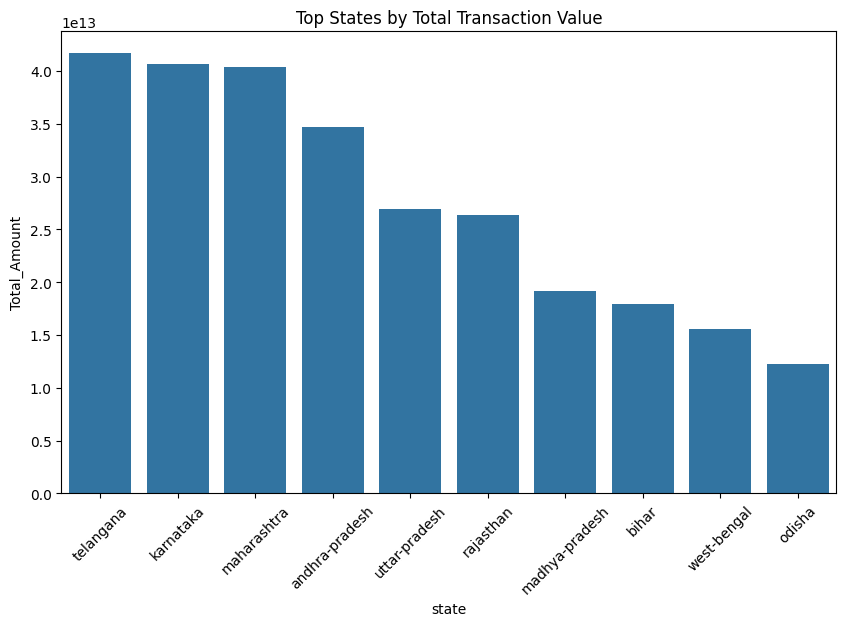

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(data=top_states, x='state', y='Total_Amount')
plt.xticks(rotation=45)
plt.title('Top States by Total Transaction Value')
plt.show()

# **Insurance Penetration and Growth Potential Analysis**

In [ ]:
# Total Insurance Transactions by State (All-Time)
query = """
SELECT State, SUM(Transaction_count) AS Total_Transactions,
       SUM(Transaction_amount) AS Total_Amount
FROM aggregated_insurance
GROUP BY State
ORDER BY Total_Transactions DESC;
"""

insurance_by_state = pd.read_sql_query(query, conn)
insurance_by_state.head()


,state,Total_Transactions,Total_Amount
0,karnataka,1957404,2.743155e+09
1,maharashtra,1815539,2.363129e+09
2,tamil-nadu,1215269,1.555507e+09
3,uttar-pradesh,1139153,1.740346e+09
4,telangana,894342,1.171060e+09


In [ ]:
# Insurance Growth by Quarter per State
query = """
SELECT state, Year, Quarter, SUM(Transaction_count) AS Total_Transactions
FROM aggregated_insurance
GROUP BY state, Year, Quarter
ORDER BY state, Year, Quarter;
"""

insurance_growth = pd.read_sql_query(query, conn)
insurance_growth['Prev'] = insurance_growth.groupby('state')['Total_Transactions'].shift(1)
insurance_growth['Growth'] = insurance_growth['Total_Transactions'] - insurance_growth['Prev']
insurance_growth['Growth_%'] = (insurance_growth['Growth'] / insurance_growth['Prev']) * 100
insurance_growth.dropna(inplace=True)
insurance_growth.head()

,state,year,quarter,Total_Transactions,Prev,Growth,Growth_%
1,andaman-&-nicobar-islands,2020,3,41,6.0,35.0,583.333333
2,andaman-&-nicobar-islands,2020,4,124,41.0,83.0,202.439024
3,andaman-&-nicobar-islands,2021,1,225,124.0,101.0,81.451613
4,andaman-&-nicobar-islands,2021,2,137,225.0,-88.0,-39.111111
5,andaman-&-nicobar-islands,2021,3,230,137.0,93.0,67.883212


In [ ]:
#Top Growing States in Latest Quarter
latest_quarter_info = insurance_growth.sort_values(['year', 'quarter'], ascending=False).iloc[0][['year', 'quarter']]

latest_year = latest_quarter_info['year']
latest_quarter = latest_quarter_info['quarter']

# Filter for latest year & quarter
latest_q_growth = insurance_growth[
    (insurance_growth['year'] == latest_year) &
    (insurance_growth['quarter'] == latest_quarter)
].sort_values('Growth_%', ascending=False)

latest_q_growth[['state', 'Total_Transactions', 'Growth_%']]
latest_q_growth.head()


,state,year,quarter,Total_Transactions,Prev,Growth,Growth_%
358,lakshadweep,2024,4,159,49.0,110.0,224.489796
453,mizoram,2024,4,489,186.0,303.0,162.903226
151,dadra-&-nagar-haveli-&-daman-&-diu,2024,4,1503,1052.0,451.0,42.870722
415,manipur,2024,4,405,285.0,120.0,42.105263
396,maharashtra,2024,4,168078,119776.0,48302.0,40.326944


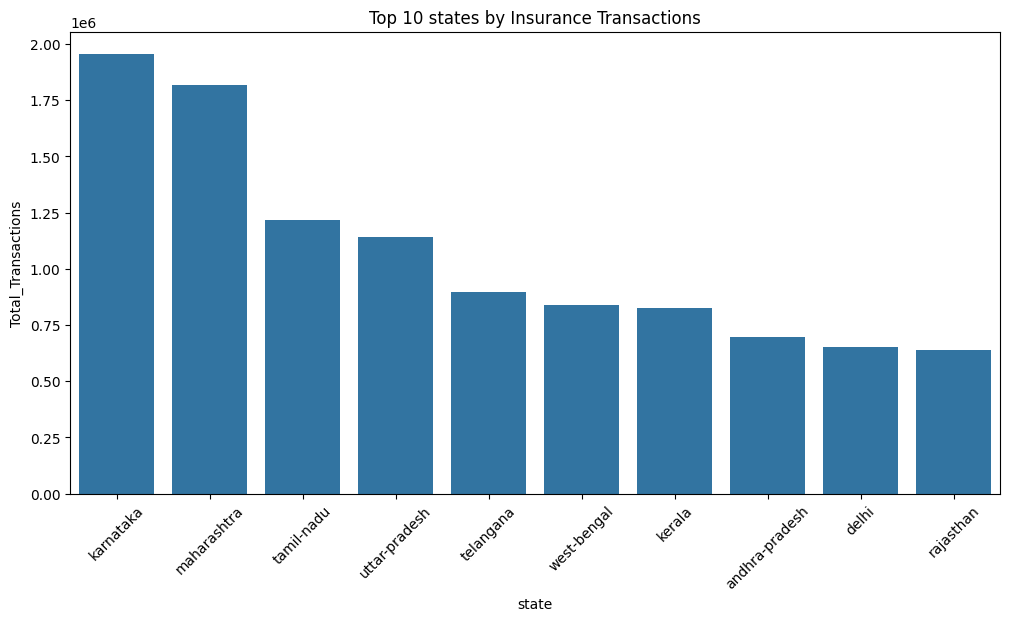

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
top_states = insurance_by_state.sort_values('Total_Transactions', ascending=False).head(10)
sns.barplot(x='state', y='Total_Transactions', data=top_states)
plt.title('Top 10 states by Insurance Transactions')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Total Registered Users and App Opens by State
query = """
SELECT state, SUM(registered_user) AS Total_Users,
       SUM(app_opens) AS Total_App_Opens
FROM map_users
GROUP BY state
ORDER BY Total_Users DESC;
"""

state_engagement = pd.read_sql_query(query, conn)
state_engagement['Engagement_Rate'] = state_engagement['Total_App_Opens'] / state_engagement['Total_Users']
state_engagement.head()

,state,Total_Users,Total_App_Opens,Engagement_Rate
0,maharashtra,1140138243,4.961642e+10,43.517902
1,uttar-pradesh,942334146,3.323683e+10,35.270752
2,karnataka,733674236,3.834488e+10,52.264176
3,andhra-pradesh,556747126,2.472802e+10,44.415181
4,rajasthan,555774493,4.850763e+10,87.279339


In [ ]:
# Districts with Highest Engagement (App Opens per User)
query = """
SELECT State, District,
       SUM(Registered_user) AS Users,
       SUM(app_opens) AS Opens
FROM map_users
GROUP BY State, District
HAVING Users > 1000  -- filter out low-user districts
ORDER BY Opens * 1.0 / Users DESC
LIMIT 10;
"""

high_engagement_districts = pd.read_sql_query(query, conn)
high_engagement_districts['Engagement_Rate'] = high_engagement_districts['Opens'] / high_engagement_districts['Users']
high_engagement_districts.head()

,state,district,Users,Opens,Engagement_Rate
0,meghalaya,south west khasi hills district,51111,91138953.0,1783.157305
1,arunachal-pradesh,pakke kessang district,22810,36494368.0,1599.928452
2,nagaland,noklak district,5447,8410530.0,1544.066459
3,meghalaya,eastern west khasi hills district,8907,13159349.0,1477.416526
4,arunachal-pradesh,shi yomi district,16753,19056063.0,1137.471677


In [ ]:
# Districts with Low Engagement but High Users (Opportunity Zones)
query = """
SELECT State, District,
       SUM(registered_user) AS Users,
       SUM(app_opens) AS Opens
FROM map_users
GROUP BY State, District
HAVING Users > 1000  -- filter out low-user districts
ORDER BY Opens * 1.0 / Users ASC
LIMIT 10;
"""

low_engagement_high_users = pd.read_sql_query(query, conn)
low_engagement_high_users['Engagement_Rate'] = low_engagement_high_users['Opens'] / low_engagement_high_users['Users']
low_engagement_high_users.head()

,state,district,Users,Opens,Engagement_Rate
0,chandigarh,chandigarh district,12855589,172230820.0,13.397350
1,uttar-pradesh,varanasi district,33686695,457176962.0,13.571440
2,maharashtra,mumbai district,44190076,605890537.0,13.711009
3,delhi,south east delhi district,34594607,477573836.0,13.804864
4,west-bengal,kolkata district,56032093,773975431.0,13.813074


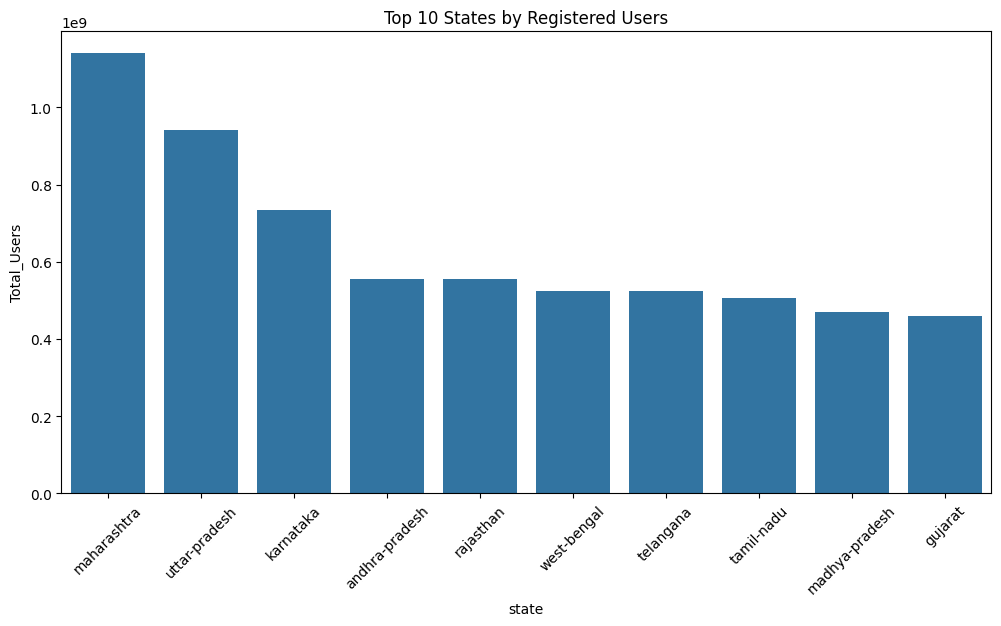

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
top_states = state_engagement.sort_values('Total_Users', ascending=False).head(10)
sns.barplot(x='state', y='Total_Users', data=top_states)
plt.xticks(rotation=45)
plt.title('Top 10 States by Registered Users')
plt.show()

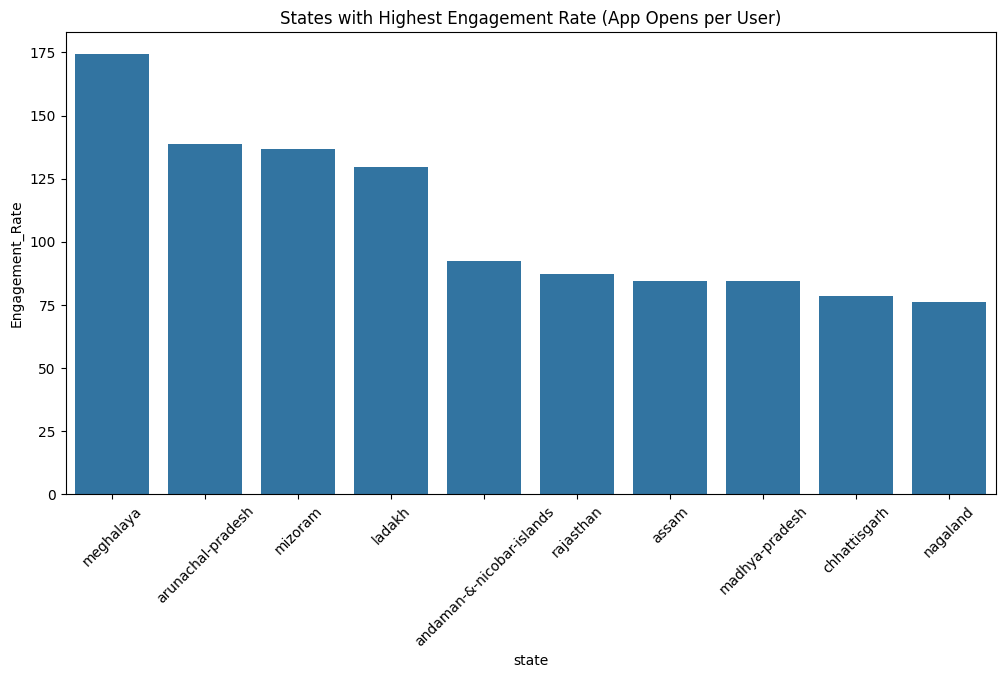

In [ ]:
plt.figure(figsize=(12,6))
top_engagement = state_engagement.sort_values('Engagement_Rate', ascending=False).head(10)
sns.barplot(x='state', y='Engagement_Rate', data=top_engagement)
plt.xticks(rotation=45)
plt.title('States with Highest Engagement Rate (App Opens per User)')
plt.show()

# **Transaction Analysis for Market Expansion**


In [ ]:
# Total Transactions by State (All Time)
query = """
SELECT State, SUM(Transaction_count) AS Total_Transactions,
       SUM(Transaction_amount) AS Total_Amount
FROM aggregated_transactions
GROUP BY State
ORDER BY Total_Transactions DESC;
"""

total_transactions_by_state = pd.read_sql_query(query, conn)
total_transactions_by_state.head()

,state,Total_Transactions,Total_Amount
0,maharashtra,31985208732,4.037420e+13
1,karnataka,30970946279,4.067872e+13
2,telangana,26174684592,4.165596e+13
3,andhra-pradesh,18918696723,3.466908e+13
4,uttar-pradesh,18523603727,2.688521e+13


In [ ]:
# Underpenetrated but High Growth States
query = """
SELECT State, SUM(Transaction_count) AS Total_Transactions
FROM aggregated_transactions
GROUP BY State
ORDER BY Total_Transactions DESC
LIMIT 05;
"""

high_growth_states = pd.read_sql_query(query, conn)
high_growth_states

,state,Total_Transactions
0,maharashtra,31985208732
1,karnataka,30970946279
2,telangana,26174684592
3,andhra-pradesh,18918696723
4,uttar-pradesh,18523603727


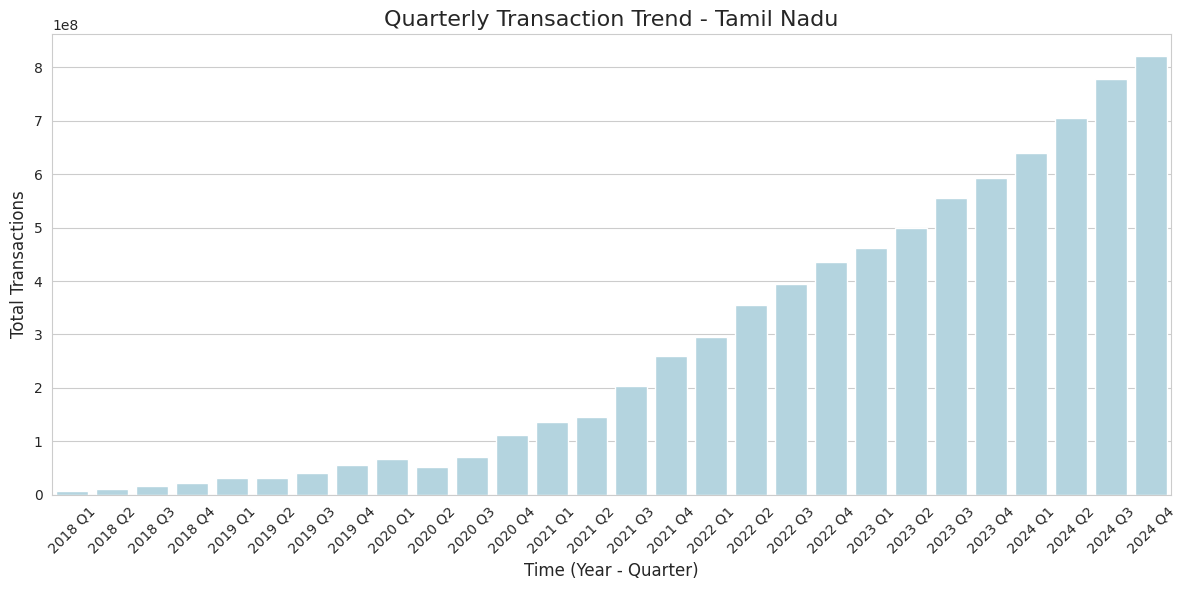

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Step 1: Convert 'year' and 'quarter' to string and combine to 'time'
tamil_nadu_growth['time'] = tamil_nadu_growth['year'].astype(str) + ' Q' + tamil_nadu_growth['quarter'].astype(str)

# ✅ Step 2: Set up the figure
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# ✅ Step 3: Plot bar chart
sns.barplot(x='time', y='total_transactions', data=tamil_nadu_growth, color='lightblue')

# ✅ Step 4: Add titles and labels
plt.title('Quarterly Transaction Trend - Tamil Nadu', fontsize=16)
plt.xlabel('Time (Year - Quarter)', fontsize=12)
plt.ylabel('Total Transactions', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# ✅ Step 5: Show the chart
plt.show()





## **User Engagement and Growth Strategy**

In [ ]:
# User Engagement by State
query = """
SELECT State, SUM(registered_user) AS Total_Users,
       SUM(app_opens) AS Total_App_Opens
FROM map_users
GROUP BY State
ORDER BY Total_Users DESC;
"""

user_engagement = pd.read_sql_query(query, conn)
user_engagement.head()

,state,Total_Users,Total_App_Opens
0,maharashtra,1140138243,4.961642e+10
1,uttar-pradesh,942334146,3.323683e+10
2,karnataka,733674236,3.834488e+10
3,andhra-pradesh,556747126,2.472802e+10
4,rajasthan,555774493,4.850763e+10


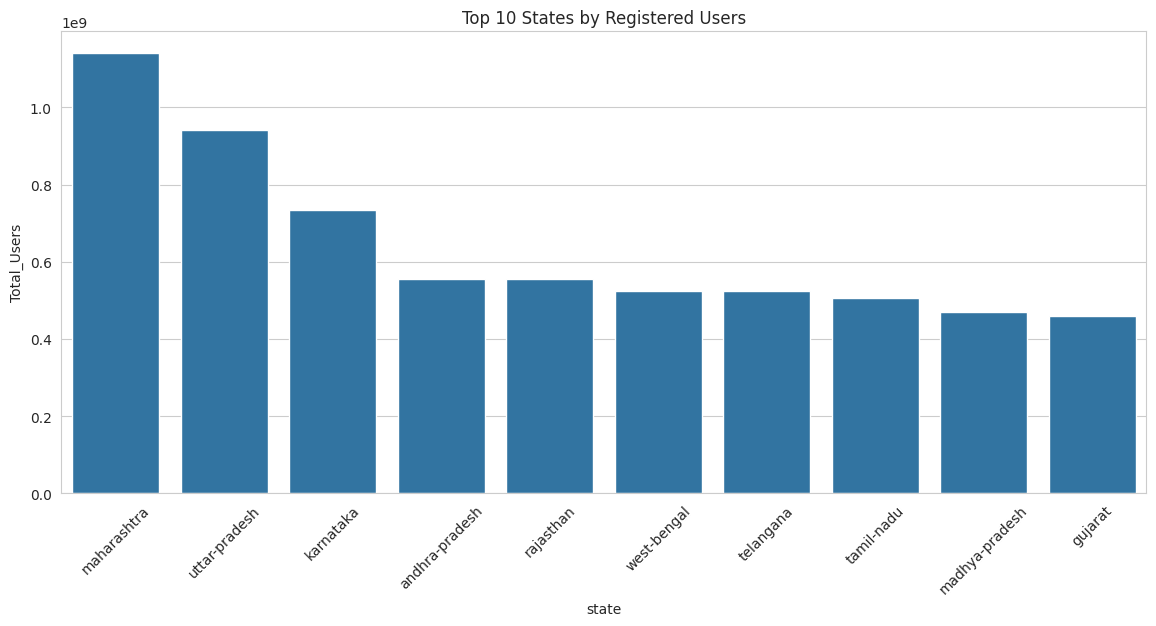

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 6))
top_states= user_engagement.sort_values('Total_Users', ascending=False).head(10)
sns.barplot(x='state', y='Total_Users', data=top_states)
plt.xticks(rotation=45)
plt.title('Top 10 States by Registered Users')
plt.show()


In [ ]:
# Top Districts by Engagement
query = """
SELECT state, district,
       SUM(registered_user) AS total_registered_users,
       SUM(app_opens) AS total_app_opens
FROM map_users
GROUP BY state, district
ORDER BY total_app_opens DESC
LIMIT 10;
"""
high_engagement_districts = pd.read_sql_query(query, conn)
high_engagement_districts.head()

,state,district,total_registered_users,total_app_opens
0,karnataka,bengaluru urban district,303663088,8.626629e+09
1,maharashtra,pune district,199346186,6.244893e+09
2,rajasthan,ganganagar district,11571144,4.524202e+09
3,rajasthan,barmer district,14138947,3.492608e+09
4,maharashtra,nashik district,62791515,3.388420e+09


### **User Registration Analysis**

In [ ]:
# Analyze user registration trends over time
query = """
SELECT Year, Quarter, SUM(registered_user) AS Total_Users
FROM map_users
GROUP BY Year, Quarter
ORDER BY Year, Quarter;
"""

user_registration_trends = pd.read_sql_query(query, conn)
user_registration_trends.head()

,year,quarter,Total_Users
0,2018,1,46877653
1,2018,2,63648009
2,2018,3,80010589
3,2018,4,102261621
4,2019,1,123432188


In [ ]:
# Identify user demographics or registration sources

query = """
SELECT State, SUM(registered_user) AS Total_Users,
       SUM(app_opens) AS Total_App_Opens
FROM map_users
GROUP BY State
ORDER BY Total_Users DESC;
"""

user_demographics = pd.read_sql_query(query, conn)
user_demographics.head()


,state,Total_Users,Total_App_Opens
0,maharashtra,1140138243,4.961642e+10
1,uttar-pradesh,942334146,3.323683e+10
2,karnataka,733674236,3.834488e+10
3,andhra-pradesh,556747126,2.472802e+10
4,rajasthan,555774493,4.850763e+10


In [ ]:
# Detect registration issues (e.g., drop-offs or errors)
query = """
SELECT State, SUM(registered_user) AS Total_Users,
       SUM(app_opens) AS Total_App_Opens
FROM map_users
GROUP BY State
ORDER BY Total_Users DESC;
"""

registration_issues = pd.read_sql_query(query, conn)
registration_issues.head()


,state,Total_Users,Total_App_Opens
0,maharashtra,1140138243,4.961642e+10
1,uttar-pradesh,942334146,3.323683e+10
2,karnataka,733674236,3.834488e+10
3,andhra-pradesh,556747126,2.472802e+10
4,rajasthan,555774493,4.850763e+10


In [ ]:
# Comparing app opens vs registrations
query = """
SELECT
  year,
  quarter,
  state,
  SUM(app_opens) AS total_app_opens,
  SUM(registered_user) AS total_registrations,
  ROUND(CAST(SUM(registered_user) AS FLOAT) / SUM(app_opens) * 100, 2) AS registration_conversion_rate
FROM map_users
GROUP BY year, quarter, state
ORDER BY year, quarter, state;
"""

df_conversion = pd.read_sql_query(query, conn)
df_conversion.head()


,year,quarter,state,total_app_opens,total_registrations,registration_conversion_rate
0,2018,1,andaman-&-nicobar-islands,0.0,6740,NaN
1,2018,1,andhra-pradesh,0.0,3336450,NaN
2,2018,1,arunachal-pradesh,0.0,21495,NaN
3,2018,1,assam,0.0,385237,NaN
4,2018,1,bihar,0.0,2133804,NaN


In [ ]:
query = """
SELECT
  year,
  quarter,
  state,
  SUM(app_opens) AS total_app_opens,
  SUM(registered_user) AS total_registrations,
  CASE
    WHEN SUM(app_opens) = 0 THEN NULL
    ELSE ROUND(CAST(SUM(registered_user) AS FLOAT) / SUM(app_opens) * 100, 2)
  END AS registration_conversion_rate
FROM map_users
GROUP BY year, quarter, state
ORDER BY year, quarter, state;
"""

df_conversion = pd.read_sql_query(query, conn)
df_conversion.head()

,year,quarter,state,total_app_opens,total_registrations,registration_conversion_rate
0,2018,1,andaman-&-nicobar-islands,0.0,6740,NaN
1,2018,1,andhra-pradesh,0.0,3336450,NaN
2,2018,1,arunachal-pradesh,0.0,21495,NaN
3,2018,1,assam,0.0,385237,NaN
4,2018,1,bihar,0.0,2133804,NaN


In [ ]:
!pip install streamlit
!pip install pyngrok


In [ ]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("phonepe.db")
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in phonepe.db:\n", tables)

Tables in phonepe.db:
                       name
0     aggregated_insurance
1          sqlite_sequence
2         aggregated_users
3            map_insurance
4         map_transactions
5                map_users
6            top_insurance
7         top_transactions
8                top_users
9  aggregated_transactions


In [ ]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("phonepe.db")
tables = [
    'aggregated_insurance',
    'aggregated_transactions',
    'aggregated_users',
    'map_insurance',
    'map_transactions',
    'map_users',
    'top_insurance',
    'top_transactions',
    'top_users'
]
for table in tables:
    df = pd.read_sql_query(f"SELECT * FROM {table}", conn)
    df.to_csv(f"{table}.csv", index=False)
    print(f"✅ Exported {table}.csv ({len(df)} rows)")


✅ Exported aggregated_insurance.csv (2046 rows)
✅ Exported aggregated_transactions.csv (5034 rows)
✅ Exported aggregated_users.csv (20196 rows)
✅ Exported map_insurance.csv (41628 rows)
✅ Exported map_transactions.csv (61812 rows)
✅ Exported map_users.csv (61824 rows)
✅ Exported top_insurance.csv (5608 rows)
✅ Exported top_transactions.csv (8296 rows)
✅ Exported top_users.csv (8296 rows)


In [ ]:
!pip install plotly

In [584]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.express as px
import requests

# Set Streamlit page config
st.set_page_config(page_title=" PhonePe Pulse", layout="wide")

# Title and markdown
st.title("Welcome to PhonePe Pulse")
st.markdown("""
# Data Insights from PhonePe Pulse

Kindly click the drop down on the left for detailed View:

- User Count
- Txn Amount
- Ins Amount
""")

# Load data
agg_users = pd.read_csv("aggregated_users.csv")
agg_txns = pd.read_csv("aggregated_transactions.csv")
agg_insurance = pd.read_csv("aggregated_insurance.csv")

# Clean column names
agg_users.columns = agg_users.columns.str.strip().str.lower()
agg_txns.columns = agg_txns.columns.str.strip().str.lower()
agg_insurance.columns = agg_insurance.columns.str.strip().str.lower()

# Standardize state names
agg_users['state'] = agg_users['state'].str.title()
agg_txns['state'] = agg_txns['state'].str.title()
agg_insurance['state'] = agg_insurance['state'].str.title()

# Aggregate metrics by state
state_user = agg_users.groupby("state")['user_count'].sum().reset_index()
state_txns = agg_txns.groupby("state")['transaction_amount'].sum().reset_index()
state_insurance = agg_insurance.groupby("state")['transaction_amount'].sum().reset_index()

# Rename columns for clarity
state_txns.rename(columns={'transaction_amount': 'txn_amount'}, inplace=True)
state_insurance.rename(columns={'transaction_amount': 'ins_amount'}, inplace=True)

# Merge all data
merged_df = state_user.merge(state_txns, on="state", how="outer")
merged_df = merged_df.merge(state_insurance, on="state", how="outer")
merged_df.fillna(0, inplace=True)

# Load GeoJSON safely
geojson_url = "https://raw.githubusercontent.com/geohacker/india/master/state/india_state.geojson"

try:
    response = requests.get(geojson_url)
    response.raise_for_status()
    geojson_data = response.json()
except (requests.exceptions.RequestException, ValueError) as e:
    st.error(f"Failed to load GeoJSON data: {e}")
    st.stop()
geo_states = [feature["properties"]["ST_NM"] for feature in geojson_data["features"]]
data_states = merged_df["state"].unique().tolist()

st.subheader("🧪 Debug Info: State Name Comparison")
st.write("🗺️ States in GeoJSON:", sorted(geo_states))
st.write("📊 States in your data:", sorted(data_states))

missing = set(data_states) - set(geo_states)
if missing:
    st.warning(f"⚠️ These states are in your data but not in the GeoJSON file: {missing}")
else:
    st.success("✅ All state names in your data match the GeoJSON file.")
# Sidebar selection

metric = st.sidebar.selectbox(
    "Choose Metric to Display on Map:",
    ["user_count", "txn_amount", "ins_amount"],
    format_func=lambda x: x.replace("_", " ").title()
)

# Plot choropleth
fig = px.choropleth(
    merged_df,
    geojson=geojson_data,
    featureidkey="properties.state_name",
    locations="state",
    color=metric,
    color_continuous_scale="Blues",
    title=f"PhonePe {metric.replace('_', ' ').title()} by state"
)

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r": 0, "t": 20, "l": 0, "b": 0})

# Show plot
st.plotly_chart(fig, use_container_width=True)


Overwriting app.py


In [585]:
# 👇 Make sure the pages/ folder exists
import os
os.makedirs("pages", exist_ok=True)



In [586]:
# 👇 Write the Dashboard page
%%writefile pages/Dashboard.py
import streamlit as st
import pandas as pd

st.set_page_config(page_title="Dashboard", layout="wide")
st.title(" PhonePe Pulse - Dashboard")

# Load data (files must be uploaded already)
map_users = pd.read_csv("map_users.csv")
map_txns = pd.read_csv("map_transactions.csv")
map_insurance = pd.read_csv("map_insurance.csv")
top_users = pd.read_csv("top_users.csv")
top_txns = pd.read_csv("top_transactions.csv")
top_insurance = pd.read_csv("top_insurance.csv")

states = sorted(map_users['state'].dropna().unique())
state = st.sidebar.selectbox("📍 Select State", states)

years = sorted(map_users['year'].dropna().unique())
year = st.sidebar.selectbox("📆 Select Year", years)

quarters = sorted(map_users['quarter'].dropna().unique())
quarter = st.sidebar.selectbox("🕓 Select Quarter", quarters)

# Users
st.header(" Users Overview")
users_filtered = map_users[
    (map_users['state'] == state) &
    (map_users['year'] == year) &
    (map_users['quarter'] == quarter)
]
st.dataframe(users_filtered[['district', 'registered_user', 'app_opens']].sort_values(by='registered_user', ascending=False))

# Transactions
st.header(" Transactions Overview")
txns_filtered = map_txns[
    (map_txns['state'] == state) &
    (map_txns['year'] == year) &
    (map_txns['quarter'] == quarter)
]
st.dataframe(txns_filtered[['district', 'transaction_count', 'transaction_amount']].sort_values(by='transaction_amount', ascending=False))

# Insurance
st.header(" Insurance Overview")
insurance_filtered = map_insurance[
    (map_insurance['state'] == state) &
    (map_insurance['year'] == year) &
    (map_insurance['quarter'] == quarter)
]
st.dataframe(insurance_filtered[['district', 'insurance_count', 'insurance_amount']].sort_values(by='insurance_amount', ascending=False))

# Top Districts
st.header(" Top Districts")
st.dataframe(top_users[top_users['state'] == state][['district', 'registered_user']].sort_values(by='registered_user', ascending=False).head(10))
st.dataframe(top_txns[top_txns['state'] == state][['district', 'transaction_amount']].sort_values(by='transaction_amount', ascending=False).head(10))
st.dataframe(top_insurance[top_insurance['state'] == state][['district', 'insurance_amount']].sort_values(by='insurance_amount', ascending=False).head(10))


Overwriting pages/Dashboard.py


In [587]:
!pip install -q streamlit pyngrok


In [588]:
!pkill streamlit
!pkill ngrok


In [589]:
from pyngrok import ngrok
import time

# Set the default port Streamlit runs on
port = 8501

# Kill old tunnels
ngrok.kill()

# Open tunnel to the streamlit port
public_url = ngrok.connect(port)
print(f"🌐 Streamlit app is live at: {public_url}")

# Run streamlit (make sure `app.py` is saved)
!streamlit run app.py &>/content/logs.txt &


🌐 Streamlit app is live at: NgrokTunnel: "https://nonpsychopathic-overbrilliant-aaden.ngrok-free.dev" -> "http://localhost:8501"
